In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [ ]:
# Uncomment these pip installs once on each PC. 
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [2]:

plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall t_MITle
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Reading in Gales Data

In [3]:
gale=pd.read_excel('Supporting_Data_1.xlsx', sheet_name="Gale_Differences")
gale_df=pd.DataFrame(data={'Sample_ID': gale['short'],
                     'SiO2': gale['SiO2'],
                        'Al2O3': gale['Al2O3'],
                      'MgO': gale['MgO'],
                     'CaO': gale['CaO'] ,
                     'Na2O': gale['Na2O'],
                     'TiO2': gale['TiO2'],
                     'FeOt': gale['FeOt']}
                        
                        )
gale_df_cpx_head=gale_df.add_suffix('_Cpx')

df_MIT=gale.loc[gale['loc']=="EMP-MASSACHUSETTS INSTITUTE OF TECHNOLOGY"]
df_TAS=gale.loc[gale['loc']=="EMP-UNIVERSITY OF TASMANIA"]
df_TUL=gale.loc[gale['loc']=="EMP-UNIVERSITY OF TULSA"]
df_HI=gale.loc[gale['loc']=="EMP-UNIVERSITY OF HAWAII"]
df_RI=gale.loc[gale['loc']=="EMP-UNIVERSITY OF RHODE ISLAND"]
df_LaMere=gale.loc[gale['loc']=="EMP-INSTITUT FRANCAIS POUR L'EXPLOITATION DE LA MER"]
df_Cape=gale.loc[gale['loc']=="EMP-UNIVERSITY OF CAPE TOWN"]
df_SUNY=gale.loc[gale['loc']=="EMP-SUNY AT STONY BROOK"]
df_RNAS=gale.loc[gale['loc']=="EMP-RUSSIAN NATIONAL ACADEMY OF SCIENCES"]
df_UBC=gale.loc[gale['loc']=="EMP-UNIVERSITY OF BRITISH COLUMBIA"]
df_ANU=gale.loc[gale['loc']=="EMP-AUSTRALIAN NATIONAL UNIVERSITY"]
df_Houston=gale.loc[gale['loc']=="EMP-UNIVERSITY OF HOUSTON"]




## Loading in Cpx B1133

In [4]:
out_Cpx_B1133=pt.import_excel('Supporting_Data_2.xlsx',
                                 sheet_name='B1133', suffix="_Cpx")
Cpx_B1133_all=out_Cpx_B1133['Cpxs']
Cpx_B1133_input_all=out_Cpx_B1133['my_input']

# As has all minerals, need to filter out things that arent Cpx
IsCpx_B1133=Cpx_B1133_input_all['phase']=="cpx"
Cpx_B1133=Cpx_B1133_all.loc[IsCpx_B1133].reset_index(drop=True)

Cpx_B1133_Mean=Cpx_B1133.mean(axis=0).to_frame().T
 

## Correcting Cpx data for various labs

In [5]:

Cpx_B1133_MIT=Cpx_B1133.copy()
Cpx_B1133_MIT['SiO2_Cpx']=Cpx_B1133['SiO2_Cpx']*df_MIT['SiO2'].values
Cpx_B1133_MIT['Al2O3_Cpx']=Cpx_B1133['Al2O3_Cpx']*df_MIT['Al2O3'].values
Cpx_B1133_MIT['MgO_Cpx']=Cpx_B1133['MgO_Cpx']*df_MIT['MgO'].values
Cpx_B1133_MIT['Na2O_Cpx']=Cpx_B1133['Na2O_Cpx']*df_MIT['Na2O'].values
Cpx_B1133_MIT['TiO2_Cpx']=Cpx_B1133['TiO2_Cpx']*df_MIT['TiO2'].values
Cpx_B1133_MIT['FeOt_Cpx']=Cpx_B1133['FeOt_Cpx']*df_MIT['FeOt'].values
Cpx_B1133_MIT['CaO_Cpx']=Cpx_B1133['CaO_Cpx']*df_MIT['CaO'].values


Cpx_B1133_MIT_TAS=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_TAS['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_TAS['SiO2'].values
Cpx_B1133_MIT_TAS['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_TAS['Al2O3'].values
Cpx_B1133_MIT_TAS['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_TAS['MgO'].values
Cpx_B1133_MIT_TAS['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_TAS['Na2O'].values
Cpx_B1133_MIT_TAS['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_TAS['TiO2'].values
Cpx_B1133_MIT_TAS['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_TAS['FeOt'].values
Cpx_B1133_MIT_TAS['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_TAS['CaO'].values

Cpx_B1133_MIT_Houston=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_Houston['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_Houston['SiO2'].values
Cpx_B1133_MIT_Houston['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_Houston['Al2O3'].values
Cpx_B1133_MIT_Houston['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_Houston['MgO'].values
Cpx_B1133_MIT_Houston['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_Houston['Na2O'].values
Cpx_B1133_MIT_Houston['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_Houston['TiO2'].values
Cpx_B1133_MIT_Houston['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_Houston['FeOt'].values
Cpx_B1133_MIT_Houston['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_Houston['CaO'].values

Cpx_B1133_MIT_Cape=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_Cape['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_Cape['SiO2'].values
Cpx_B1133_MIT_Cape['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_Cape['Al2O3'].values
Cpx_B1133_MIT_Cape['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_Cape['MgO'].values
Cpx_B1133_MIT_Cape['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_Cape['Na2O'].values
Cpx_B1133_MIT_Cape['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_Cape['TiO2'].values
Cpx_B1133_MIT_Cape['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_Cape['FeOt'].values
Cpx_B1133_MIT_Cape['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_Cape['CaO'].values

Cpx_B1133_MIT_SUNY=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_SUNY['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_SUNY['SiO2'].values
Cpx_B1133_MIT_SUNY['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_SUNY['Al2O3'].values
Cpx_B1133_MIT_SUNY['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_SUNY['MgO'].values
Cpx_B1133_MIT_SUNY['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_SUNY['Na2O'].values
Cpx_B1133_MIT_SUNY['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_SUNY['TiO2'].values
Cpx_B1133_MIT_SUNY['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_SUNY['FeOt'].values
Cpx_B1133_MIT_SUNY['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_SUNY['CaO'].values

Cpx_B1133_MIT_RNAS=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_RNAS['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_RNAS['SiO2'].values
Cpx_B1133_MIT_RNAS['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_RNAS['Al2O3'].values
Cpx_B1133_MIT_RNAS['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_RNAS['MgO'].values
Cpx_B1133_MIT_RNAS['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_RNAS['Na2O'].values
Cpx_B1133_MIT_RNAS['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_RNAS['TiO2'].values
Cpx_B1133_MIT_RNAS['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_RNAS['FeOt'].values
Cpx_B1133_MIT_RNAS['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_RNAS['CaO'].values

Cpx_B1133_MIT_UBC=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_UBC['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_UBC['SiO2'].values
Cpx_B1133_MIT_UBC['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_UBC['Al2O3'].values
Cpx_B1133_MIT_UBC['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_UBC['MgO'].values
Cpx_B1133_MIT_UBC['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_UBC['Na2O'].values
Cpx_B1133_MIT_UBC['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_UBC['TiO2'].values
Cpx_B1133_MIT_UBC['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_UBC['FeOt'].values
Cpx_B1133_MIT_UBC['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_UBC['CaO'].values

Cpx_B1133_MIT_ANU=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_ANU['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_ANU['SiO2'].values
Cpx_B1133_MIT_ANU['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_ANU['Al2O3'].values
Cpx_B1133_MIT_ANU['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_ANU['MgO'].values
Cpx_B1133_MIT_ANU['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_ANU['Na2O'].values
Cpx_B1133_MIT_ANU['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_ANU['TiO2'].values
Cpx_B1133_MIT_ANU['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_ANU['FeOt'].values
Cpx_B1133_MIT_ANU['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_ANU['CaO'].values



Cpx_B1133_MIT_TUL=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_TUL['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_TUL['SiO2'].values
Cpx_B1133_MIT_TUL['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_TUL['Al2O3'].values
Cpx_B1133_MIT_TUL['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_TUL['MgO'].values
Cpx_B1133_MIT_TUL['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_TUL['Na2O'].values
Cpx_B1133_MIT_TUL['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_TUL['TiO2'].values
Cpx_B1133_MIT_TUL['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_TUL['FeOt'].values
Cpx_B1133_MIT_TUL['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_TUL['CaO'].values


Cpx_B1133_MIT_HI=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_HI['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_HI['SiO2'].values
Cpx_B1133_MIT_HI['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_HI['Al2O3'].values
Cpx_B1133_MIT_HI['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_HI['MgO'].values
Cpx_B1133_MIT_HI['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_HI['Na2O'].values
Cpx_B1133_MIT_HI['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_HI['TiO2'].values
Cpx_B1133_MIT_HI['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_HI['FeOt'].values
Cpx_B1133_MIT_HI['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_HI['CaO'].values



Cpx_B1133_MIT_RI=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_RI['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_RI['SiO2'].values
Cpx_B1133_MIT_RI['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_RI['Al2O3'].values
Cpx_B1133_MIT_RI['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_RI['MgO'].values
Cpx_B1133_MIT_RI['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_RI['Na2O'].values
Cpx_B1133_MIT_RI['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_RI['TiO2'].values
Cpx_B1133_MIT_RI['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_RI['FeOt'].values
Cpx_B1133_MIT_RI['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_RI['CaO'].values



Cpx_B1133_MIT_LaMere=Cpx_B1133_MIT.copy()
Cpx_B1133_MIT_LaMere['SiO2_Cpx']=Cpx_B1133_MIT['SiO2_Cpx']/df_LaMere['SiO2'].values
Cpx_B1133_MIT_LaMere['Al2O3_Cpx']=Cpx_B1133_MIT['Al2O3_Cpx']/df_LaMere['Al2O3'].values
Cpx_B1133_MIT_LaMere['MgO_Cpx']=Cpx_B1133_MIT['MgO_Cpx']/df_LaMere['MgO'].values
Cpx_B1133_MIT_LaMere['Na2O_Cpx']=Cpx_B1133_MIT['Na2O_Cpx']/df_LaMere['Na2O'].values
Cpx_B1133_MIT_LaMere['TiO2_Cpx']=Cpx_B1133_MIT['TiO2_Cpx']/df_LaMere['TiO2'].values
Cpx_B1133_MIT_LaMere['FeOt_Cpx']=Cpx_B1133_MIT['FeOt_Cpx']/df_LaMere['FeOt'].values
Cpx_B1133_MIT_LaMere['CaO_Cpx']=Cpx_B1133_MIT['CaO_Cpx']/df_LaMere['CaO'].values

## Loading in B1133 liquid

In [6]:
out_Liq_B1133=pt.import_excel('Supporting_Data_2.xlsx', 
                sheet_name='B1133_Glass', suffix="_Liq")
Liq_B1133=out_Liq_B1133['Liqs']
Liq_B1133_input_all=out_Liq_B1133['my_input']

### Corecting liquid

In [7]:
Liq_B1133_MIT=Liq_B1133.copy()
Liq_B1133_MIT['SiO2_Liq']=Liq_B1133['SiO2_Liq']*df_MIT['SiO2'].values
Liq_B1133_MIT['Al2O3_Liq']=Liq_B1133['Al2O3_Liq']*df_MIT['Al2O3'].values
Liq_B1133_MIT['MgO_Liq']=Liq_B1133['MgO_Liq']*df_MIT['MgO'].values
Liq_B1133_MIT['Na2O_Liq']=Liq_B1133['Na2O_Liq']*df_MIT['Na2O'].values
Liq_B1133_MIT['TiO2_Liq']=Liq_B1133['TiO2_Liq']*df_MIT['TiO2'].values
Liq_B1133_MIT['FeOt_Liq']=Liq_B1133['FeOt_Liq']*df_MIT['FeOt'].values
Liq_B1133_MIT['CaO_Liq']=Liq_B1133['CaO_Liq']*df_MIT['CaO'].values


Liq_B1133_MIT_TAS=Liq_B1133_MIT.copy()
Liq_B1133_MIT_TAS['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_TAS['SiO2'].values
Liq_B1133_MIT_TAS['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_TAS['Al2O3'].values
Liq_B1133_MIT_TAS['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_TAS['MgO'].values
Liq_B1133_MIT_TAS['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_TAS['Na2O'].values
Liq_B1133_MIT_TAS['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_TAS['TiO2'].values
Liq_B1133_MIT_TAS['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_TAS['FeOt'].values
Liq_B1133_MIT_TAS['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_TAS['CaO'].values

Liq_B1133_MIT_Houston=Liq_B1133_MIT.copy()
Liq_B1133_MIT_Houston['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_Houston['SiO2'].values
Liq_B1133_MIT_Houston['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_Houston['Al2O3'].values
Liq_B1133_MIT_Houston['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_Houston['MgO'].values
Liq_B1133_MIT_Houston['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_Houston['Na2O'].values
Liq_B1133_MIT_Houston['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_Houston['TiO2'].values
Liq_B1133_MIT_Houston['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_Houston['FeOt'].values
Liq_B1133_MIT_Houston['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_Houston['CaO'].values

Liq_B1133_MIT_Cape=Liq_B1133_MIT.copy()
Liq_B1133_MIT_Cape['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_Cape['SiO2'].values
Liq_B1133_MIT_Cape['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_Cape['Al2O3'].values
Liq_B1133_MIT_Cape['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_Cape['MgO'].values
Liq_B1133_MIT_Cape['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_Cape['Na2O'].values
Liq_B1133_MIT_Cape['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_Cape['TiO2'].values
Liq_B1133_MIT_Cape['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_Cape['FeOt'].values
Liq_B1133_MIT_Cape['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_Cape['CaO'].values

Liq_B1133_MIT_SUNY=Liq_B1133_MIT.copy()
Liq_B1133_MIT_SUNY['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_SUNY['SiO2'].values
Liq_B1133_MIT_SUNY['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_SUNY['Al2O3'].values
Liq_B1133_MIT_SUNY['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_SUNY['MgO'].values
Liq_B1133_MIT_SUNY['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_SUNY['Na2O'].values
Liq_B1133_MIT_SUNY['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_SUNY['TiO2'].values
Liq_B1133_MIT_SUNY['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_SUNY['FeOt'].values
Liq_B1133_MIT_SUNY['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_SUNY['CaO'].values

Liq_B1133_MIT_RNAS=Liq_B1133_MIT.copy()
Liq_B1133_MIT_RNAS['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_RNAS['SiO2'].values
Liq_B1133_MIT_RNAS['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_RNAS['Al2O3'].values
Liq_B1133_MIT_RNAS['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_RNAS['MgO'].values
Liq_B1133_MIT_RNAS['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_RNAS['Na2O'].values
Liq_B1133_MIT_RNAS['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_RNAS['TiO2'].values
Liq_B1133_MIT_RNAS['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_RNAS['FeOt'].values
Liq_B1133_MIT_RNAS['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_RNAS['CaO'].values

Liq_B1133_MIT_UBC=Liq_B1133_MIT.copy()
Liq_B1133_MIT_UBC['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_UBC['SiO2'].values
Liq_B1133_MIT_UBC['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_UBC['Al2O3'].values
Liq_B1133_MIT_UBC['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_UBC['MgO'].values
Liq_B1133_MIT_UBC['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_UBC['Na2O'].values
Liq_B1133_MIT_UBC['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_UBC['TiO2'].values
Liq_B1133_MIT_UBC['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_UBC['FeOt'].values
Liq_B1133_MIT_UBC['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_UBC['CaO'].values

Liq_B1133_MIT_ANU=Liq_B1133_MIT.copy()
Liq_B1133_MIT_ANU['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_ANU['SiO2'].values
Liq_B1133_MIT_ANU['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_ANU['Al2O3'].values
Liq_B1133_MIT_ANU['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_ANU['MgO'].values
Liq_B1133_MIT_ANU['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_ANU['Na2O'].values
Liq_B1133_MIT_ANU['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_ANU['TiO2'].values
Liq_B1133_MIT_ANU['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_ANU['FeOt'].values
Liq_B1133_MIT_ANU['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_ANU['CaO'].values



Liq_B1133_MIT_TUL=Liq_B1133_MIT.copy()
Liq_B1133_MIT_TUL['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_TUL['SiO2'].values
Liq_B1133_MIT_TUL['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_TUL['Al2O3'].values
Liq_B1133_MIT_TUL['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_TUL['MgO'].values
Liq_B1133_MIT_TUL['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_TUL['Na2O'].values
Liq_B1133_MIT_TUL['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_TUL['TiO2'].values
Liq_B1133_MIT_TUL['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_TUL['FeOt'].values
Liq_B1133_MIT_TUL['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_TUL['CaO'].values


Liq_B1133_MIT_HI=Liq_B1133_MIT.copy()
Liq_B1133_MIT_HI['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_HI['SiO2'].values
Liq_B1133_MIT_HI['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_HI['Al2O3'].values
Liq_B1133_MIT_HI['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_HI['MgO'].values
Liq_B1133_MIT_HI['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_HI['Na2O'].values
Liq_B1133_MIT_HI['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_HI['TiO2'].values
Liq_B1133_MIT_HI['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_HI['FeOt'].values
Liq_B1133_MIT_HI['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_HI['CaO'].values



Liq_B1133_MIT_RI=Liq_B1133_MIT.copy()
Liq_B1133_MIT_RI['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_RI['SiO2'].values
Liq_B1133_MIT_RI['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_RI['Al2O3'].values
Liq_B1133_MIT_RI['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_RI['MgO'].values
Liq_B1133_MIT_RI['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_RI['Na2O'].values
Liq_B1133_MIT_RI['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_RI['TiO2'].values
Liq_B1133_MIT_RI['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_RI['FeOt'].values
Liq_B1133_MIT_RI['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_RI['CaO'].values



Liq_B1133_MIT_LaMere=Liq_B1133_MIT.copy()
Liq_B1133_MIT_LaMere['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_LaMere['SiO2'].values
Liq_B1133_MIT_LaMere['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_LaMere['Al2O3'].values
Liq_B1133_MIT_LaMere['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_LaMere['MgO'].values
Liq_B1133_MIT_LaMere['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_LaMere['Na2O'].values
Liq_B1133_MIT_LaMere['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_LaMere['TiO2'].values
Liq_B1133_MIT_LaMere['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_LaMere['FeOt'].values
Liq_B1133_MIT_LaMere['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_LaMere['CaO'].values

## Loading B1133 liquid

In [8]:
out_Liq_B1133=pt.import_excel('Supporting_Data_2.xlsx', sheet_name='B1133_Glass', suffix="_Liq")
Liq_B1133=out_Liq_B1133['Liqs']
Liq_B1133_input_all=out_Liq_B1133['my_input']

### Correcting B1133 liquid

In [9]:

Liq_B1133_MIT=Liq_B1133.copy()
Liq_B1133_MIT['SiO2_Liq']=Liq_B1133['SiO2_Liq']*df_MIT['SiO2'].values
Liq_B1133_MIT['Al2O3_Liq']=Liq_B1133['Al2O3_Liq']*df_MIT['Al2O3'].values
Liq_B1133_MIT['MgO_Liq']=Liq_B1133['MgO_Liq']*df_MIT['MgO'].values
Liq_B1133_MIT['Na2O_Liq']=Liq_B1133['Na2O_Liq']*df_MIT['Na2O'].values
Liq_B1133_MIT['TiO2_Liq']=Liq_B1133['TiO2_Liq']*df_MIT['TiO2'].values
Liq_B1133_MIT['FeOt_Liq']=Liq_B1133['FeOt_Liq']*df_MIT['FeOt'].values
Liq_B1133_MIT['CaO_Liq']=Liq_B1133['CaO_Liq']*df_MIT['CaO'].values

Liq_B1133_MIT_Houston=Liq_B1133_MIT.copy()
Liq_B1133_MIT_Houston['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_Houston['SiO2'].values
Liq_B1133_MIT_Houston['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_Houston['Al2O3'].values
Liq_B1133_MIT_Houston['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_Houston['MgO'].values
Liq_B1133_MIT_Houston['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_Houston['Na2O'].values
Liq_B1133_MIT_Houston['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_Houston['TiO2'].values
Liq_B1133_MIT_Houston['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_Houston['FeOt'].values
Liq_B1133_MIT_Houston['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_Houston['CaO'].values

Liq_B1133_MIT_TAS=Liq_B1133_MIT.copy()
Liq_B1133_MIT_TAS['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_TAS['SiO2'].values
Liq_B1133_MIT_TAS['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_TAS['Al2O3'].values
Liq_B1133_MIT_TAS['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_TAS['MgO'].values
Liq_B1133_MIT_TAS['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_TAS['Na2O'].values
Liq_B1133_MIT_TAS['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_TAS['TiO2'].values
Liq_B1133_MIT_TAS['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_TAS['FeOt'].values
Liq_B1133_MIT_TAS['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_TAS['CaO'].values

Liq_B1133_MIT_Cape=Liq_B1133_MIT.copy()
Liq_B1133_MIT_Cape['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_Cape['SiO2'].values
Liq_B1133_MIT_Cape['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_Cape['Al2O3'].values
Liq_B1133_MIT_Cape['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_Cape['MgO'].values
Liq_B1133_MIT_Cape['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_Cape['Na2O'].values
Liq_B1133_MIT_Cape['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_Cape['TiO2'].values
Liq_B1133_MIT_Cape['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_Cape['FeOt'].values
Liq_B1133_MIT_Cape['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_Cape['CaO'].values

Liq_B1133_MIT_SUNY=Liq_B1133_MIT.copy()
Liq_B1133_MIT_SUNY['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_SUNY['SiO2'].values
Liq_B1133_MIT_SUNY['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_SUNY['Al2O3'].values
Liq_B1133_MIT_SUNY['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_SUNY['MgO'].values
Liq_B1133_MIT_SUNY['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_SUNY['Na2O'].values
Liq_B1133_MIT_SUNY['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_SUNY['TiO2'].values
Liq_B1133_MIT_SUNY['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_SUNY['FeOt'].values
Liq_B1133_MIT_SUNY['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_SUNY['CaO'].values

Liq_B1133_MIT_RNAS=Liq_B1133_MIT.copy()
Liq_B1133_MIT_RNAS['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_RNAS['SiO2'].values
Liq_B1133_MIT_RNAS['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_RNAS['Al2O3'].values
Liq_B1133_MIT_RNAS['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_RNAS['MgO'].values
Liq_B1133_MIT_RNAS['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_RNAS['Na2O'].values
Liq_B1133_MIT_RNAS['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_RNAS['TiO2'].values
Liq_B1133_MIT_RNAS['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_RNAS['FeOt'].values
Liq_B1133_MIT_RNAS['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_RNAS['CaO'].values

Liq_B1133_MIT_UBC=Liq_B1133_MIT.copy()
Liq_B1133_MIT_UBC['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_UBC['SiO2'].values
Liq_B1133_MIT_UBC['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_UBC['Al2O3'].values
Liq_B1133_MIT_UBC['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_UBC['MgO'].values
Liq_B1133_MIT_UBC['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_UBC['Na2O'].values
Liq_B1133_MIT_UBC['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_UBC['TiO2'].values
Liq_B1133_MIT_UBC['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_UBC['FeOt'].values
Liq_B1133_MIT_UBC['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_UBC['CaO'].values

Liq_B1133_MIT_ANU=Liq_B1133_MIT.copy()
Liq_B1133_MIT_ANU['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_ANU['SiO2'].values
Liq_B1133_MIT_ANU['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_ANU['Al2O3'].values
Liq_B1133_MIT_ANU['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_ANU['MgO'].values
Liq_B1133_MIT_ANU['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_ANU['Na2O'].values
Liq_B1133_MIT_ANU['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_ANU['TiO2'].values
Liq_B1133_MIT_ANU['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_ANU['FeOt'].values
Liq_B1133_MIT_ANU['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_ANU['CaO'].values



Liq_B1133_MIT_TUL=Liq_B1133_MIT.copy()
Liq_B1133_MIT_TUL['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_TUL['SiO2'].values
Liq_B1133_MIT_TUL['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_TUL['Al2O3'].values
Liq_B1133_MIT_TUL['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_TUL['MgO'].values
Liq_B1133_MIT_TUL['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_TUL['Na2O'].values
Liq_B1133_MIT_TUL['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_TUL['TiO2'].values
Liq_B1133_MIT_TUL['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_TUL['FeOt'].values
Liq_B1133_MIT_TUL['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_TUL['CaO'].values


Liq_B1133_MIT_HI=Liq_B1133_MIT.copy()
Liq_B1133_MIT_HI['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_HI['SiO2'].values
Liq_B1133_MIT_HI['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_HI['Al2O3'].values
Liq_B1133_MIT_HI['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_HI['MgO'].values
Liq_B1133_MIT_HI['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_HI['Na2O'].values
Liq_B1133_MIT_HI['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_HI['TiO2'].values
Liq_B1133_MIT_HI['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_HI['FeOt'].values
Liq_B1133_MIT_HI['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_HI['CaO'].values



Liq_B1133_MIT_RI=Liq_B1133_MIT.copy()
Liq_B1133_MIT_RI['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_RI['SiO2'].values
Liq_B1133_MIT_RI['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_RI['Al2O3'].values
Liq_B1133_MIT_RI['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_RI['MgO'].values
Liq_B1133_MIT_RI['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_RI['Na2O'].values
Liq_B1133_MIT_RI['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_RI['TiO2'].values
Liq_B1133_MIT_RI['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_RI['FeOt'].values
Liq_B1133_MIT_RI['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_RI['CaO'].values



Liq_B1133_MIT_LaMere=Liq_B1133_MIT.copy()
Liq_B1133_MIT_LaMere['SiO2_Liq']=Liq_B1133_MIT['SiO2_Liq']/df_LaMere['SiO2'].values
Liq_B1133_MIT_LaMere['Al2O3_Liq']=Liq_B1133_MIT['Al2O3_Liq']/df_LaMere['Al2O3'].values
Liq_B1133_MIT_LaMere['MgO_Liq']=Liq_B1133_MIT['MgO_Liq']/df_LaMere['MgO'].values
Liq_B1133_MIT_LaMere['Na2O_Liq']=Liq_B1133_MIT['Na2O_Liq']/df_LaMere['Na2O'].values
Liq_B1133_MIT_LaMere['TiO2_Liq']=Liq_B1133_MIT['TiO2_Liq']/df_LaMere['TiO2'].values
Liq_B1133_MIT_LaMere['FeOt_Liq']=Liq_B1133_MIT['FeOt_Liq']/df_LaMere['FeOt'].values
Liq_B1133_MIT_LaMere['CaO_Liq']=Liq_B1133_MIT['CaO_Liq']/df_LaMere['CaO'].values

## Calculating Cpx-Liq P and T For B1133
- Here we calculate a mean composition of Cpx and Liq for different labs, where we have corrected both the liquid and the Cpx compositions for EPMA lab offsets 

In [10]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    ## Correcting liquid and cpx
    Cpx_Liq_B1133_Calc_Meas=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")

    Cpx_Liq_B1133_Calc_Corr_MIT=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_TAS=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_TAS.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_TAS.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_TUL=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_TUL.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_TUL.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_HI=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_HI.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_HI.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_RI=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_RI.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_RI.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")

    Cpx_Liq_B1133_Calc_Corr_LaMere=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_LaMere.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_LaMere.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")

    Cpx_Liq_B1133_Calc_Corr_Cape=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_Cape.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_Cape.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")

    Cpx_Liq_B1133_Calc_Corr_SUNY=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_SUNY.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_SUNY.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_RNAS=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_RNAS.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_RNAS.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_UBC=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_UBC.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_UBC.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    Cpx_Liq_B1133_Calc_Corr_ANU=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_ANU.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_ANU.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")
    
    Cpx_Liq_B1133_Calc_Corr_Houston=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_B1133_MIT_Houston.mean(axis=0).to_frame().T,
                                                                     liq_comps=Liq_B1133_MIT_Houston.mean(axis=0).to_frame().T,
          equationT="T_Put2008_eq33", equationP="P_Neave2017")    

## Cpx only pressure and temperatures for B1133

In [11]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Cpx_B1133_Calc_Meas=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133, H2O_Liq=13)
    Cpx_B1133_Calc_Corr_MIT=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT, H2O_Liq=13)
    Cpx_B1133_Calc_Corr_TAS=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_TAS, H2O_Liq=13)

    Cpx_B1133_Calc_Meas=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133.mean(axis=0).to_frame().T, H2O_Liq=13)
    Cpx_B1133_Calc_Corr_MIT=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT.mean(axis=0).to_frame().T, H2O_Liq=13)
    Cpx_B1133_Calc_Corr_TAS=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_TAS.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_TUL=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_TUL.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_HI=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_HI.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_RI=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_RI.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_LaMere=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_LaMere.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_Cape=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_Cape.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_SUNY=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_SUNY.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_RNAS=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_RNAS.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_UBC=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_UBC.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_ANU=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_ANU.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)
    Cpx_B1133_Calc_Corr_Houston=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1133_MIT_Houston.mean(axis=0).to_frame().T,
                                                                     H2O_Liq=13)

## Figure showing correction factor and Cpx only

C:\Users\penny\AppData\Local\Temp\ipykernel_18796\503684177.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([1, 1.12], [1, 1], '-k', lw=0.3, color='grey')
C:\Users\penny\AppData\Local\Temp\ipykernel_18796\503684177.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([1, 1], [0.93, 1.09], '-k', lw=0.3, color='grey')
C:\Users\penny\AppData\Local\Temp\ipykernel_18796\503684177.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0.95, 1.07], [1, 1], '-k', lw=0.3, color='grey')
C:\Users\penny\AppData\Local\Temp\ipykernel_18796\503684177.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the

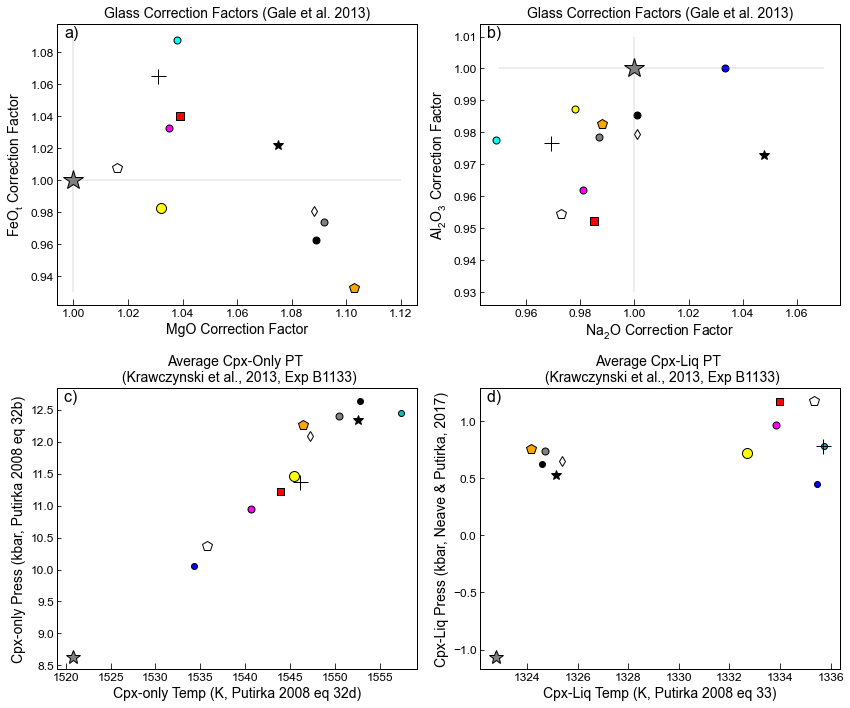

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF HAWAII"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF HAWAII"], 'ok', ms=7, label='HI')
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF RHODE ISLAND"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF RHODE ISLAND"], 'ok', mfc='cyan', ms=7, label='RI')
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-MASSACHUSETTS INSTITUTE OF TECHNOLOGY"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-MASSACHUSETTS INSTITUTE OF TECHNOLOGY"], 'ok', mfc='yellow', ms=7, label='M_MIT')
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-SUNY AT STONY BROOK"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-SUNY AT STONY BROOK"], 'pk', mfc='white', ms=10, label='SUNY')
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF HOUSTON"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF HOUSTON"], 'ok', mfc='grey', ms=7, label='Houston'
        )
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF TULSA"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF TULSA"], 'ok', mfc='blue', ms=7, label='Tulsa')
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF CAPE TOWN"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF CAPE TOWN"], 'ok', mfc='magenta', ms=7, label='Cape Town')

ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-INSTITUT FRANCAIS POUR L'EXPLOITATION DE LA MER"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-INSTITUT FRANCAIS POUR L'EXPLOITATION DE LA MER"], 'sk', mfc='red', ms=8, label='La Mere')

ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF TASMANIA"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF TASMANIA"], '*k', mfc='k', ms=10, label='Tasmania'
        )
ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-RUSSIAN NATIONAL ACADEMY OF SCIENCES"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-RUSSIAN NATIONAL ACADEMY OF SCIENCES"], 'pk', mfc='orange', ms=10, label='Russian NAS')

ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-UNIVERSITY OF BRITISH COLUMBIA"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-UNIVERSITY OF BRITISH COLUMBIA"], 'dk', mfc='white', ms=7, label='UBC')

ax2.plot(gale['Na2O'].loc[gale['loc']=="EMP-AUSTRALIAN NATIONAL UNIVERSITY"], 
         gale['Al2O3'].loc[gale['loc']=="EMP-AUSTRALIAN NATIONAL UNIVERSITY"], '+k', ms=15, lw=2, label='ANU')

ax2.set_xlabel('Na$_2$O Correction Factor')
ax2.set_ylabel('Al$_2$O$_3$ Correction Factor')

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF HAWAII"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF HAWAII"], 'ok', ms=7)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF RHODE ISLAND"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF RHODE ISLAND"], 'ok', mfc='cyan', ms=7)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-MASSACHUSETTS INSTITUTE OF TECHNOLOGY"], 
         gale['FeOt'].loc[gale['loc']=="EMP-MASSACHUSETTS INSTITUTE OF TECHNOLOGY"], 'ok', mfc='yellow', ms=10)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-SUNY AT STONY BROOK"], 
         gale['FeOt'].loc[gale['loc']=="EMP-SUNY AT STONY BROOK"], 'pk', mfc='white', ms=10)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF HOUSTON"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF HOUSTON"], 'ok', mfc='grey', ms=7)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF TULSA"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF TULSA"], 'ok', mfc='blue', ms=7)
ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF CAPE TOWN"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF CAPE TOWN"], 'ok', mfc='magenta', ms=7)

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-INSTITUT FRANCAIS POUR L'EXPLOITATION DE LA MER"], 
         gale['FeOt'].loc[gale['loc']=="EMP-INSTITUT FRANCAIS POUR L'EXPLOITATION DE LA MER"], 'sk', mfc='red', ms=8)

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF TASMANIA"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF TASMANIA"], '*k', mfc='k', ms=10)

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-RUSSIAN NATIONAL ACADEMY OF SCIENCES"], 
         gale['FeOt'].loc[gale['loc']=="EMP-RUSSIAN NATIONAL ACADEMY OF SCIENCES"], 'pk', mfc='orange', ms=10)

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-UNIVERSITY OF BRITISH COLUMBIA"], 
         gale['FeOt'].loc[gale['loc']=="EMP-UNIVERSITY OF BRITISH COLUMBIA"], 'dk', mfc='white', ms=7)

ax1.plot(gale['MgO'].loc[gale['loc']=="EMP-AUSTRALIAN NATIONAL UNIVERSITY"], 
         gale['FeOt'].loc[gale['loc']=="EMP-AUSTRALIAN NATIONAL UNIVERSITY"], '+k', ms=15, lw=2)

ax1.set_xlabel('MgO Correction Factor')
ax1.set_ylabel('FeO$_t$ Correction Factor')
ax1.plot([1, 1.12], [1, 1], '-k', lw=0.3, color='grey')
ax1.plot([1, 1], [0.93, 1.09], '-k', lw=0.3, color='grey')
ax2.plot([0.95, 1.07], [1, 1], '-k', lw=0.3, color='grey')
ax2.plot([1, 1], [0.93, 1.01], '-k', lw=0.3, color='grey')
ax1.plot(1, 1, '*k', ms=20, mfc='grey')#, label='Lamont')
ax2.plot(1, 1, '*k', ms=20, mfc='grey')#,  label='Lamont')

# handles, labels = ax2.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=7)

#### Thermobarometry - Cpx only
x='T_Put_Teq32d_Peq32b'
y='P_Put_Teq32d_Peq32b'
ax3.plot(Cpx_B1133_Calc_Meas[x], Cpx_B1133_Calc_Meas[y], 'ok', mfc='yellow', ms=10)
# plt.plot(Cpx_B1133_Calc_Meas[x], Cpx_B1133_Calc_Meas[y], '.k', mfc='yellow')
# plt.plot(Cpx_B1133_Calc_Corr_MIT[x], Cpx_B1133_Calc_Corr_MIT[y], '.r')
ax3.plot(Cpx_B1133_Calc_Corr_MIT[x], Cpx_B1133_Calc_Corr_MIT[y], '*k', mfc='grey', ms=15)
ax3.plot(Cpx_B1133_Calc_Corr_TAS[x], Cpx_B1133_Calc_Corr_TAS[y], '*k', mfc='k', ms=10)
ax3.plot(Cpx_B1133_Calc_Corr_TUL[x], Cpx_B1133_Calc_Corr_TUL[y], 'ok', mfc='b')
ax3.plot(Cpx_B1133_Calc_Corr_HI[x], Cpx_B1133_Calc_Corr_HI[y], 'ok', mfc='k')
ax3.plot(Cpx_B1133_Calc_Corr_RI[x], Cpx_B1133_Calc_Corr_RI[y], 'ok', mfc='c')
ax3.plot(Cpx_B1133_Calc_Corr_LaMere[x], Cpx_B1133_Calc_Corr_LaMere[y], 'sk', mfc='r', ms=7)
ax3.plot(Cpx_B1133_Calc_Corr_LaMere[x], Cpx_B1133_Calc_Corr_LaMere[y], 'sk', mfc='r', ms=7)
ax3.plot(Cpx_B1133_Calc_Corr_Cape[x], Cpx_B1133_Calc_Corr_Cape[y], 'ok', mfc='magenta', ms=7)
ax3.plot(Cpx_B1133_Calc_Corr_SUNY[x], Cpx_B1133_Calc_Corr_SUNY[y], 'pk', mfc='white', ms=10)
ax3.plot(Cpx_B1133_Calc_Corr_RNAS[x], Cpx_B1133_Calc_Corr_RNAS[y], 'pk', mfc='orange', ms=10)
ax3.plot(Cpx_B1133_Calc_Corr_UBC[x], Cpx_B1133_Calc_Corr_UBC[y], 'dk', mfc='white', ms=7)
ax3.plot(Cpx_B1133_Calc_Corr_ANU[x], Cpx_B1133_Calc_Corr_ANU[y], '+k',  ms=15)
ax3.plot(Cpx_B1133_Calc_Corr_Houston[x], Cpx_B1133_Calc_Corr_Houston[y], 'ok', mfc='grey', ms=7)


ax3.set_ylabel('Cpx-only Press (kbar, Putirka 2008 eq 32b)')
ax3.set_xlabel('Cpx-only Temp (K, Putirka 2008 eq 32d)')
ax3.plot()

## Cpx-Liq, Liq and Cpx correctd
x='T_K_calc'
y='P_kbar_calc'
ax4.plot(Cpx_Liq_B1133_Calc_Meas[x], Cpx_Liq_B1133_Calc_Meas[y], 'ok', mfc='yellow', ms=10)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_MIT[x], Cpx_Liq_B1133_Calc_Corr_MIT[y], '*k', mfc='grey', ms=15)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_TAS[x], Cpx_Liq_B1133_Calc_Corr_TAS[y], '*k', mfc='k', ms=10)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_TUL[x], Cpx_Liq_B1133_Calc_Corr_TUL[y], 'ok', mfc='b')
ax4.plot(Cpx_Liq_B1133_Calc_Corr_HI[x], Cpx_Liq_B1133_Calc_Corr_HI[y], 'ok', mfc='k')
ax4.plot(Cpx_Liq_B1133_Calc_Corr_RI[x], Cpx_Liq_B1133_Calc_Corr_RI[y], 'ok', mfc='c')
ax4.plot(Cpx_Liq_B1133_Calc_Corr_LaMere[x], Cpx_Liq_B1133_Calc_Corr_LaMere[y], 'sk', mfc='r', ms=7)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_Cape[x], Cpx_Liq_B1133_Calc_Corr_Cape[y], 'ok', mfc='magenta', ms=7)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_SUNY[x], Cpx_Liq_B1133_Calc_Corr_SUNY[y], 'pk', mfc='white', ms=10)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_RNAS[x], Cpx_Liq_B1133_Calc_Corr_RNAS[y], 'pk', mfc='orange', ms=10)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_UBC[x], Cpx_Liq_B1133_Calc_Corr_UBC[y], 'dk', mfc='white', ms=7)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_ANU[x], Cpx_Liq_B1133_Calc_Corr_ANU[y], '+k',  ms=15)
ax4.plot(Cpx_Liq_B1133_Calc_Corr_Houston[x], Cpx_Liq_B1133_Calc_Corr_Houston[y], 'ok', mfc='grey', ms=7)

ax4.set_ylabel('Cpx-Liq Press (kbar, Neave & Putirka, 2017)')
ax4.set_xlabel('Cpx-Liq Temp (K, Putirka 2008 eq 33)')
ax4.plot()

ax1.set_title('Glass Correction Factors (Gale et al. 2013)')
ax2.set_title('Glass Correction Factors (Gale et al. 2013)')
ax3.set_title('Average Cpx-Only PT \n (Krawczynski et al., 2013, Exp B1133)')
ax4.set_title('Average Cpx-Liq PT \n (Krawczynski et al., 2013, Exp B1133)')

ax1.annotate("a)", 
             xy=(0.02, 0.95), xycoords="axes fraction", fontsize=16)
ax2.annotate("b) ", 
             xy=(0.02, 0.95), xycoords="axes fraction", fontsize=16)
ax3.annotate("c) ", 
             xy=(0.02, 0.95), xycoords="axes fraction", fontsize=16)
ax4.annotate("d) ", 
             xy=(0.02, 0.95), xycoords="axes fraction", fontsize=16)
plt.tight_layout()


fig.savefig('Lab_Corrections_B1133.png', dpi=300)